# Accor Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#accre = pd.read_csv('./data/july-2017-thru-june-2018.txt', sep="|", chunksize=5000).get_chunk()
accre = pd.read_csv('./data/july-2017-thru-june-2018.txt', sep="|", low_memory=False)
accre.head(10)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21
5,15811618,15811618,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:00:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1063,skim_test
6,15811619,15811619,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:00:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1062,skim_test
7,15811621,15811621,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:22,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_33ee450ebdc4
8,15811624,15811624,accre,production,cms_stage2,cms_stage1,59298,autocms,9209.0,2017-07-01T05:01:01,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp670,skim_test
9,15811625,15811625,accre,production,cms_stage2,cms,31000,tuos,126986.0,2017-07-01T05:01:02,...,COMPLETED,1,1,1,2Gc,NaN,"cpu=1,mem=2G,node=1",12:00:00,vmp1078,skim_test


In [3]:
accre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 25 columns):
JobID        object
JobIDRaw     int64
Cluster      object
Partition    object
Account      object
Group        object
GID          int64
User         object
UID          float64
Submit       object
Eligible     object
Start        object
End          object
Elapsed      object
ExitCode     object
State        object
NNodes       int64
NCPUS        int64
ReqCPUS      int64
ReqMem       object
ReqGRES      object
ReqTRES      object
Timelimit    object
NodeList     object
JobName      object
dtypes: float64(1), int64(5), object(19)
memory usage: 2.3+ GB


In [4]:
accre.shape

(12499389, 25)

In [5]:
accre.columns

Index(['JobID', 'JobIDRaw', 'Cluster', 'Partition', 'Account', 'Group', 'GID',
       'User', 'UID', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed',
       'ExitCode', 'State', 'NNodes', 'NCPUS', 'ReqCPUS', 'ReqMem', 'ReqGRES',
       'ReqTRES', 'Timelimit', 'NodeList', 'JobName'],
      dtype='object')

In [6]:
# convert Submit and Start to datetime
accre['Submit'] = pd.to_datetime(accre['Submit'], format='%Y/%m/%d')
accre['Start'] = pd.to_datetime(accre['Start'], format='%Y/%m/%d')
accre['End'] = pd.to_datetime(accre['End'], format='%Y/%m/%d')

In [7]:
# check head of Submit
accre.Submit.head()

0   2017-07-02 00:40:58
1   2017-07-02 00:40:58
2   2017-07-02 00:40:58
3   2017-07-02 00:40:58
4   2017-07-01 05:00:00
Name: Submit, dtype: datetime64[ns]

In [8]:
# check head of Start
accre.Start.head()

0   2017-07-03 02:13:59
1   2017-07-03 02:20:08
2   2017-07-03 02:41:13
3   2017-07-03 02:51:53
4   2017-07-01 05:00:01
Name: Start, dtype: datetime64[ns]

In [9]:
# check head of End
accre.End.head()

0   2017-07-04 03:19:20
1   2017-07-04 02:11:55
2   2017-07-04 04:41:04
3   2017-07-04 10:54:13
4   2017-07-01 05:00:11
Name: End, dtype: datetime64[ns]

In [10]:
# create Elapsed_calc column = End - Start # Just to check if there is any difference....
accre['Elapsed_calc'] = accre['End'] - accre['Start']
accre.Elapsed_calc.head()

0   1 days 01:05:21
1   0 days 23:51:47
2   1 days 01:59:51
3   1 days 08:02:20
4   0 days 00:00:10
Name: Elapsed_calc, dtype: timedelta64[ns]

In [23]:
# pick columns: 'Elapsed', 'User', 'Group', 'Account'
#acr_elps = accre.sort_values(by='Elapsed', ascending=False)[['JobID', 'JobIDRaw', 'Account', 'Group', 'GID', 'User', 'Submit','End','Elapsed_calc', 'Elapsed']]
acr_elps = accre[['JobID', 'JobIDRaw', 'Account', 'Group', 'GID', 'User', 'Submit','End','Elapsed_calc', 'Elapsed']]
acr_elps.head()

,JobID,JobIDRaw,Account,Group,GID,User,Submit,End,Elapsed_calc,Elapsed
0,15806649,15806649,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 03:19:20,1 days 01:05:21,1-01:05:21
1,15806664,15806664,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 02:11:55,0 days 23:51:47,23:51:47
2,15806670,15806670,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 04:41:04,1 days 01:59:51,1-01:59:51
3,15806671,15806671,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 10:54:13,1 days 08:02:20,1-08:02:20
4,15811617,15811617,cms_samtest,cms_samtest,59297,uscms010,2017-07-01 05:00:00,2017-07-01 05:00:11,0 days 00:00:10,00:00:10


In [24]:
#Checking stats of Elapsed
acr_elps.Elapsed.describe()

count     12499389
unique      191812
top       00:00:00
freq       3523868
Name: Elapsed, dtype: object

In [25]:
#Extracting days and non-days time values from Elapsed
acr_elps['elapsed_days'] = acr_elps['Elapsed'].str.extract('(\d+)-', expand=True).fillna('0')
acr_elps['elapsed_hms'] = acr_elps['Elapsed'].str.extract('(\d+:\d+:\d+)', expand=True)
acr_elps.head()


/anaconda3/envs/NSS/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/NSS/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,JobID,JobIDRaw,Account,Group,GID,User,Submit,End,Elapsed_calc,Elapsed,elapsed_days,elapsed_hms
0,15806649,15806649,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 03:19:20,1 days 01:05:21,1-01:05:21,1,01:05:21
1,15806664,15806664,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 02:11:55,0 days 23:51:47,23:51:47,0,23:51:47
2,15806670,15806670,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 04:41:04,1 days 01:59:51,1-01:59:51,1,01:59:51
3,15806671,15806671,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,2017-07-04 10:54:13,1 days 08:02:20,1-08:02:20,1,08:02:20
4,15811617,15811617,cms_samtest,cms_samtest,59297,uscms010,2017-07-01 05:00:00,2017-07-01 05:00:11,0 days 00:00:10,00:00:10,0,00:00:10


In [26]:
#acr_elps['Elap_td'] = pd.to_timedelta(acr_elps.Elapsed)

In [27]:
#acr_elps.head()

In [29]:
# Converting elapsed_hms to date time format

#def time_converter(x):
#    print(x.elapsed_hms)
#    return timedelta(
#         hours=(int(x['elapsed_days'][0]) * 24) + int(x['elapsed_hms'][0:2]),
#         minutes=int(x['elapsed_hms'][3:5]),
#         seconds=int(x['elapsed_hms'][6:])
#     )

#acr_elps['elapsed_time'] = acr_elps.apply(time_converter, axis=1)

#acr_elps.head()

In [30]:
#acr_elps = acr_elps.drop(['Elapsed', 'elapsed_days', 'elapsed_hms'], axis=1)
acr_elps = accre[['JobID', 'JobIDRaw', 'Account', 'Group', 'GID', 'User', 'Submit', 'Elapsed_calc']]
acr_elps.head()

,JobID,JobIDRaw,Account,Group,GID,User,Submit,Elapsed_calc
0,15806649,15806649,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,1 days 01:05:21
1,15806664,15806664,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,0 days 23:51:47
2,15806670,15806670,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,1 days 01:59:51
3,15806671,15806671,h_vuiis,h_vuiis,36052,masispider,2017-07-02 00:40:58,1 days 08:02:20
4,15811617,15811617,cms_samtest,cms_samtest,59297,uscms010,2017-07-01 05:00:00,0 days 00:00:10


In [31]:
acr_elps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499389 entries, 0 to 12499388
Data columns (total 8 columns):
JobID           object
JobIDRaw        int64
Account         object
Group           object
GID             int64
User            object
Submit          datetime64[ns]
Elapsed_calc    timedelta64[ns]
dtypes: datetime64[ns](1), int64(2), object(4), timedelta64[ns](1)
memory usage: 762.9+ MB


In [33]:
#acr_elps.elapsed_time.describe()
acr_elps.Elapsed_calc.describe()

count                  12499389
mean     0 days 01:52:36.230351
std      0 days 07:36:33.906640
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:01:59
75%             0 days 00:26:18
max            14 days 11:40:46
Name: Elapsed_calc, dtype: object

In [34]:
acr_elps['User'].value_counts()

cmsglidein    4005234
deik           667769
sotocs         646076
autocms        471424
cmslocal       467394
cakira         416327
ozgunka        373381
zhangdk        371131
shockle        308142
janjamrk       302093
uscms010       271589
moonj          260413
schlunsg       213261
tuos           191581
jacklisr       180124
kuenzeg        169301
schluedj       164660
jiany17        163375
wangj36        157526
msrc           157348
chipmajj       151041
smithst        148613
tierneje       139122
vuiiscci       136805
brockc         136077
sivleyrm        82370
delaladp        75836
meyerct1        73758
zhoud2          60788
kochenma        60071
               ...   
leedm               2
pesnerme            2
perezae             2
yuul                2
lindsedr            1
brownhm2            1
mautzb              1
carlsobl            1
nshutil             1
clineci             1
khanoa              1
pateloj             1
luok                1
dongew              1
elmoree   

In [35]:
#accre_user_elapsed.groupby('User')['elapsed_time'].value_counts()
#small_jobs = pd.DataFrame(acr_elps[acr_elps['elapsed_time'] < timedelta(minutes = 5)].groupby('User')['elapsed_time'].count())
#small_jobs = acr_elps[acr_elps['elapsed_time'] < timedelta(minutes = 5)].groupby('User')['elapsed_time'].value_counts().to_frame().reset_index()
#small_jobs
#acr_elps[acr_elps['elapsed_time'] < timedelta(minutes = 5)].groupby('User')['elapsed_time'].value_counts()
acr_elps[acr_elps['Elapsed_calc'] < timedelta(minutes = 5)].groupby('User')['Elapsed_calc'].value_counts()



User     Elapsed_calc
abraha1  00:00:02        4359
         00:00:03        3369
         00:00:01        2800
         00:00:04        2483
         00:00:05        1846
         00:00:07        1742
         00:00:08        1573
         00:00:06        1470
         00:00:09        1173
         00:00:13         838
         00:00:15         778
         00:00:14         765
         00:00:10         718
         00:00:16         691
         00:00:17         631
         00:00:19         618
         00:00:20         618
         00:00:12         575
         00:00:18         554
         00:00:21         548
         00:00:11         546
         00:00:22         448
         00:00:23         388
         00:00:24         372
         00:00:25         349
         00:00:26         331
         00:00:27         300
         00:00:28         274
         00:00:30         269
         00:00:29         261
                         ... 
zimrana  00:01:19           1
         00:01:21 

In [39]:
# Goal is to generate a table of users, jobids (within 4 hours time) and elapsed time (<5min)

#small_jobs_rolling = pd.DataFrame(acr_elps[acr_elps['elapsed_time'] < timedelta(minutes = 5)])#.groupby(['User', 'Submit']).rolling('4h', on='Submit').JobID.count())#.sort_values(by=['User', 'Submit']).reset_index()

small_jobs = pd.DataFrame(acr_elps[acr_elps['Elapsed_calc'] < timedelta(minutes = 5)])

small_jobs.head()



,JobID,JobIDRaw,Account,Group,GID,User,Submit,Elapsed_calc
4,15811617,15811617,cms_samtest,cms_samtest,59297,uscms010,2017-07-01 05:00:00,00:00:10
5,15811618,15811618,cms_stage2,cms_stage1,59298,autocms,2017-07-01 05:00:01,00:03:18
6,15811619,15811619,cms_stage2,cms,31000,tuos,2017-07-01 05:00:02,00:02:03
7,15811621,15811621,cms_samtest,cms_samtest,59297,uscms010,2017-07-01 05:00:22,00:00:10
8,15811624,15811624,cms_stage2,cms_stage1,59298,autocms,2017-07-01 05:01:01,00:04:47


In [40]:
small_jobs.shape

(7708907, 8)

In [41]:
small_jobs.sort_values('Submit', inplace=True)

In [42]:
# Goal is to generate a table of users, jobids (within 4 hours time) and elapsed time (<5min)

small_jobs_rolling = small_jobs.groupby('User').rolling('4h', on='Submit').JobIDRaw.count()

small_jobs_rolling = pd.DataFrame(small_jobs_rolling).reset_index()
#small_jobs_rolling.to_frame().reset_index().head()
print(small_jobs_rolling.head())
print(small_jobs_rolling.shape)

      User              Submit  JobIDRaw
0  abraha1 2017-10-07 18:58:44       1.0
1  abraha1 2017-10-07 19:06:01       2.0
2  abraha1 2017-10-07 19:12:39       3.0
3  abraha1 2017-10-07 19:21:18       4.0
4  abraha1 2017-10-07 19:29:20       5.0
(7708907, 3)


In [53]:
# Counting jobs to find Users with high numbers of job runs

#runs_500 = small_jobs[small_jobs.groupby('User')['Submit'].value_counts() >=500]

runs_count = small_jobs_rolling.groupby('User').max()
runs_count.head()

,Submit,JobIDRaw
User,,
abraha1,2018-06-28 23:29:05,17948.0
actkink,2018-06-19 17:15:08,13.0
ahmedi,2018-06-21 20:54:00,21.0
aimantj,2018-06-12 08:35:24,198.0
ainoosj,2018-01-22 16:37:26,4.0


In [66]:
runs_count_500 = runs_count.loc[runs_count['JobIDRaw'] >= 500]
runs_count_500.sort_values('JobIDRaw', ascending=False, inplace=True)
runs_count_500.head()

/anaconda3/envs/NSS/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Submit,JobIDRaw
User,,
sotocs,2018-04-07 13:22:18,260961.0
wangj36,2018-06-24 01:21:43,75906.0
zhangdk,2018-04-04 17:42:50,75611.0
jacklisr,2017-10-03 12:59:52,69808.0
janjamrk,2018-06-30 23:54:22,41174.0


In [64]:
runs_count_500.shape

(93, 2)

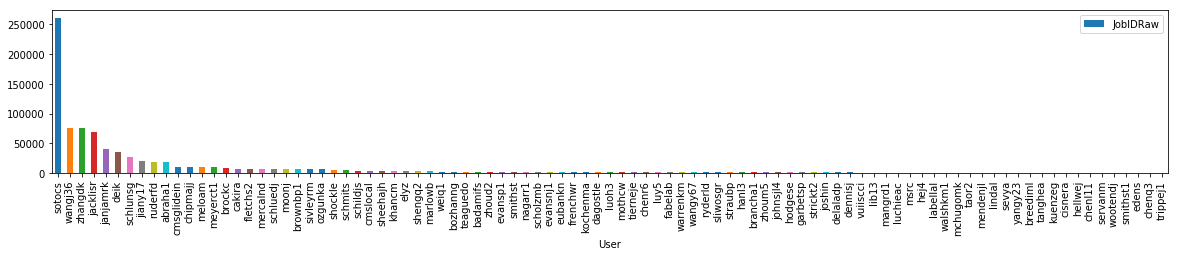

In [65]:
plt.rcParams["figure.figsize"]=(20,3)
runs_count_500.plot.bar(y='JobIDRaw')


In [ ]:
print(small_jobs_rolling.value_counts(ascending=False))
print(small_jobs_rolling.head())

In [ ]:
boxplot = acr_elps.boxplot(column='elapsed_time',by='User')

In [ ]:
sns.jointplot(x='User', y='elapsed_time', data=data_returns

In [ ]:
boxplot = acr_elps.boxplot ser.resample('D').sum().plot()